In [12]:
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import pickle as pkl
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D
from tf_keras_vis.activation_maximization.regularizers import TotalVariation2D, Norm
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tensorflow.keras import activations
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tf_keras_vis.gradcam import Gradcam
import matplotlib.pyplot as plt


In [3]:
class_model = load_model("/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/train_benchmark/trained_models/2DCNN_Training_Benchmark_2DTimesweeper_Class_aft")
sdn_reg_model = load_model("/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/train_benchmark/trained_models/REG_2DCNN_Training_Benchmark_sdn_minmax_2DTimesweeper_Reg_aft")
ssv_reg_model = load_model("/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/train_benchmark/trained_models/REG_2DCNN_Training_Benchmark_ssv_minmax_2DTimesweeper_Reg_aft")

2023-02-24 12:32:21.845922: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /nas/longleaf/rhel8/apps/samtools/1.17/lib:/nas/longleaf/rhel8/apps/samtools/1.17/htslib/lib
2023-02-24 12:32:21.845958: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-24 12:32:21.845978: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (longleaf-login4.its.unc.edu): /proc/driver/nvidia/version does not exist
2023-02-24 12:32:21.849250: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow wit

In [8]:
test_data = pkl.load(open('/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/testing_data.pkl', 'rb'))

In [9]:
neut = test_data["neut"]["0"]["aft"]
sdn = test_data["sdn"]["0"]["aft"]
ssv = test_data["ssv"]["0"]["aft"]

X = preprocess_input(np.asarray([neut, sdn, ssv]))
X = np.expand_dims(X, -1)

In [10]:
X.shape

(3, 20, 51, 1)

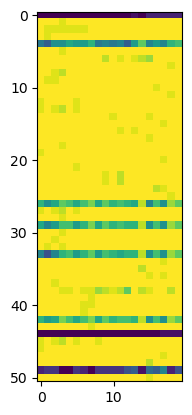

In [13]:
plt.imshow(neut.T)


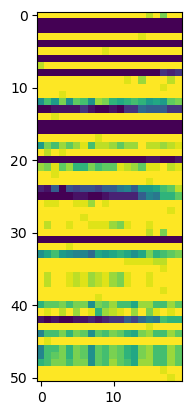

In [ ]:
plt.imshow(sdn.T)

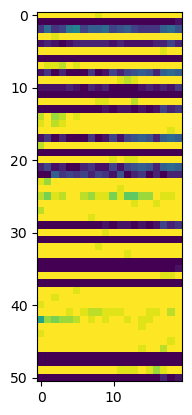

In [ ]:
plt.imshow(ssv.T)

In [14]:
replace2linear = ReplaceToLinear()
score = CategoricalScore([0, 1, 2])

In [15]:
saliency = Saliency(class_model, model_modifier=replace2linear, clone=True)
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.2)

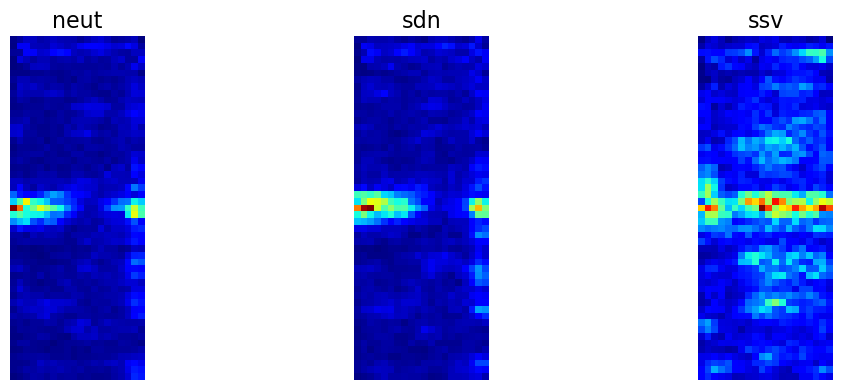

In [16]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(["neut", "sdn", "ssv"]):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i].T, cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [38]:
class_model = load_model("/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/train_benchmark/trained_models/2DCNN_Training_Benchmark_2DTimesweeper_Class_hft")
sdn_reg_model = load_model("/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/train_benchmark/trained_models/REG_2DCNN_Training_Benchmark_sdn_minmax_2DTimesweeper_Reg_hft")
ssv_reg_model = load_model("/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/train_benchmark/trained_models/REG_2DCNN_Training_Benchmark_ssv_minmax_2DTimesweeper_Reg_hft")


In [39]:
neut = test_data["neut"]["0"]["hft"].T
sdn = test_data["sdn"]["0"]["hft"].T
ssv = test_data["ssv"]["0"]["hft"].T

X = preprocess_input(np.asarray([neut, sdn, ssv]))
X = np.expand_dims(X, -1)


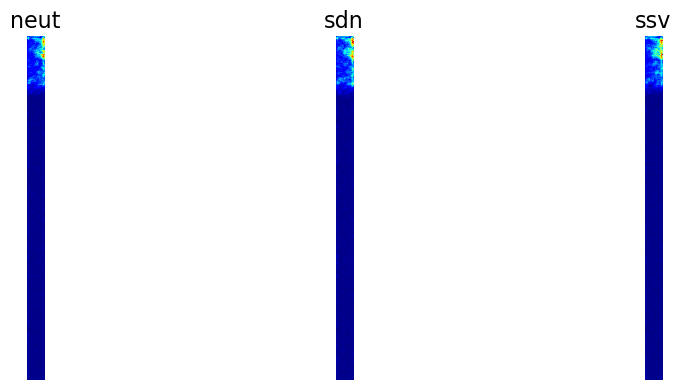

In [40]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(["neut", "sdn", "ssv"]):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i].T, cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

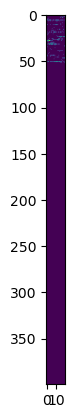

In [41]:
plt.imshow(sdn)
